In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

# Ravdess

In [2]:
Ravdess="C:\\Users\\Nada Najari\\Downloads\\Ravdess\\audio_speech_actors_01-24\\"
ravdess_directory_list = os.listdir(Ravdess)

In [3]:

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...


In [4]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

In [5]:
data

array([9.51426409e-05, 1.64977813e-04, 1.19230936e-04, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], dtype=float32)

In [6]:
sampling_rate

22050

In [7]:
Audio(path)

# Tess

In [8]:
Tess="C:\\Users\\Nada Najari\\Downloads\\TESS\\tess toronto emotional speech set data/TESS Toronto emotional speech set data\\"
tess_directory_list = os.listdir(Tess)

In [9]:
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
1,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
2,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
3,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...
4,angry,C:\Users\Nada Najari\Downloads\TESS\tess toron...


# Savee

In [10]:
Savee1 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/DC/"
Savee2 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/JE/"
Savee3 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/JK/"
Savee4 = "C:\\Users\\Nada Najari\\Downloads\\SAVEE/AudioData/KL/"

In [11]:
L=[Savee1,Savee2,Savee3,Savee4]
file_emotion=[]
file_path=[]

for i in L:
    savee_directory_list= os.listdir(i)
    
    for file in savee_directory_list:
        file_path.append(i+file)
        ele=file[:-6]
        if ele=='a':
            file_emotion.append('angry')
        elif ele=='d':
            file_emotion.append('disgust')
        elif ele=='f':
            file_emotion.append('fear')
        elif ele=='h':
            file_emotion.append('happy')
        elif ele=='n':
            file_emotion.append('neutral')
        elif ele=='sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')
            
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
1,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
2,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
3,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
4,angry,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


# Crema

In [12]:
Crema="C:\\Users\\Nada Najari\\Downloads\\Crema\\AudioWAV\\"
crema_directory_list = os.listdir(Crema)

In [13]:
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
1,disgust,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
2,fear,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
3,happy,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...
4,neutral,C:\Users\Nada Najari\Downloads\Crema\AudioWAV\...


# Final Data

In [14]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...


In [15]:
data_path

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
475,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
476,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
477,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
478,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [16]:
data_path.reset_index(drop=True)

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,calm,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
12157,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
12158,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
12159,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
12160,surprise,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [17]:
data_path['Emotions'].unique()

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust',
       'surprise'], dtype=object)

# Visualisation des données

<AxesSubplot:>

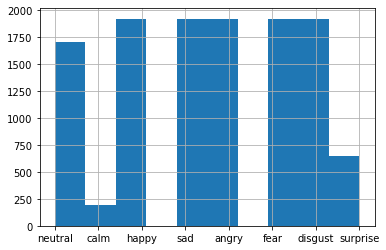

In [18]:
data_path['Emotions'].hist()

In [19]:
import collections
collections.Counter(data_path['Emotions'])

Counter({'neutral': 1703,
         'calm': 192,
         'happy': 1923,
         'sad': 1923,
         'angry': 1923,
         'fear': 1923,
         'disgust': 1923,
         'surprise': 652})

# Final Classes

In [20]:
df=pd.concat([data_path.loc[data_path['Emotions']=='neutral'], data_path.loc[data_path['Emotions']=='sad'], data_path.loc[data_path['Emotions']=='angry'],data_path.loc[data_path['Emotions']=='fear'], data_path.loc[data_path['Emotions']=='disgust']], axis = 0)

In [21]:
df

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
60,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
385,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
386,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
387,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
388,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [22]:
df.reset_index(drop=True)

,Emotions,Path
0,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
1,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
2,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
3,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
4,neutral,C:\Users\Nada Najari\Downloads\Ravdess\audio_s...
...,...,...
9390,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
9391,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
9392,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...
9393,disgust,C:\Users\Nada Najari\Downloads\SAVEE/AudioData...


In [23]:
df['Emotions'].unique()

array(['neutral', 'sad', 'angry', 'fear', 'disgust'], dtype=object)

In [25]:
df1=pd.read_csv('Final Dataset2.csv')

In [26]:
df1.drop(df1.filter(regex='Unname'),axis=1, inplace=True)

In [27]:
df1

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x790,x791,x792,x793,x794,x795,x796,x797,x798,x799
0,-1.979558,-3.021072,4.157546,15.732176,-34.424443,39.654388,14.705246,-9.764299,-25.450203,-21.552517,...,0.560407,0.253715,0.138367,-0.533811,-0.169403,0.669081,0.888801,1.399485,0.743607,-0.720082
1,-1.849681,-3.118820,4.358643,18.432433,-36.721770,38.320672,16.887618,-6.675679,-24.009238,-21.898692,...,-0.299692,-0.469536,-0.242703,0.355703,0.255354,-0.447229,1.308129,-0.901984,0.074005,0.867657
2,-1.780895,-3.205864,3.835181,10.404853,-29.710821,41.403476,8.596527,-16.117351,-27.187871,-18.708665,...,0.687796,0.420799,-0.233304,0.202395,0.998187,0.792490,-0.201708,1.004649,-0.522653,-0.381420
3,-1.408252,-3.469831,3.233724,1.797657,-20.784271,42.352236,-4.013058,-26.243642,-25.549737,-8.902485,...,0.864846,-0.627041,0.592732,0.334145,-0.403551,-0.301404,0.074032,-0.474449,-0.136121,-0.188187
4,-2.058326,-3.518295,4.416538,38.011624,-45.106124,17.291470,24.274299,16.911050,-1.818234,-10.210623,...,-1.033271,-0.323766,-0.604076,0.161224,0.557430,0.704192,0.043716,-0.114555,1.162881,0.280118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,-0.748382,-2.945932,3.725810,-12.112875,7.264827,-15.795024,25.881972,-19.275158,-7.587172,22.424130,...,1.517529,0.800184,1.778371,0.308376,-0.359344,-0.000718,1.132752,4.230298,2.483101,2.587484
12158,0.053261,-4.919584,-2.120354,82.102786,-18.546229,-42.842034,-21.617220,8.952767,20.462003,31.048866,...,-2.225771,-0.772897,0.972035,-0.944760,-0.599139,2.645078,-1.683720,-0.398122,0.328068,-0.035153
12159,0.108217,-3.705113,5.056894,41.105760,-53.075460,24.179237,27.969192,18.775622,-5.020289,-13.963065,...,1.121093,0.242182,0.212024,0.060927,-0.715895,0.321182,1.896841,0.181938,-1.823358,-0.580570
12160,-13.780785,242.648368,-352.340316,-109.102241,-165.478393,-67.795003,-29.006885,0.240993,17.954897,33.955320,...,-1.207121,2.894432,0.671065,2.698027,0.736062,-2.474920,2.501873,-3.023414,-0.773438,2.264807


In [28]:
L=list(zip(data_path.Path, data_path.Emotions))

In [29]:
len(L)

12162

In [30]:
L=list(zip(data_path.Path, data_path.Emotions))



emotions=[]
for i in L:
    emotions.append(i[1])




df1['emotions']=emotions



df1=pd.concat([df1.loc[df1['emotions']=='neutral'], df1.loc[df1['emotions']=='sad'], df1.loc[df1['emotions']=='angry'],df1.loc[df1['emotions']=='fear'], df1.loc[df1['emotions']=='disgust']], axis = 0)




df1.reset_index(drop=True)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x791,x792,x793,x794,x795,x796,x797,x798,x799,emotions
0,-1.979558,-3.021072,4.157546,15.732176,-34.424443,39.654388,14.705246,-9.764299,-25.450203,-21.552517,...,0.253715,0.138367,-0.533811,-0.169403,0.669081,0.888801,1.399485,0.743607,-0.720082,neutral
1,-1.849681,-3.118820,4.358643,18.432433,-36.721770,38.320672,16.887618,-6.675679,-24.009238,-21.898692,...,-0.469536,-0.242703,0.355703,0.255354,-0.447229,1.308129,-0.901984,0.074005,0.867657,neutral
2,-1.780895,-3.205864,3.835181,10.404853,-29.710821,41.403476,8.596527,-16.117351,-27.187871,-18.708665,...,0.420799,-0.233304,0.202395,0.998187,0.792490,-0.201708,1.004649,-0.522653,-0.381420,neutral
3,-1.408252,-3.469831,3.233724,1.797657,-20.784271,42.352236,-4.013058,-26.243642,-25.549737,-8.902485,...,-0.627041,0.592732,0.334145,-0.403551,-0.301404,0.074032,-0.474449,-0.136121,-0.188187,neutral
4,-1.799636,-3.267139,2.679379,52.727960,-49.387958,5.418391,21.012070,24.241493,10.775952,1.493472,...,0.041254,-2.690339,1.080970,1.472156,-1.274416,-1.485488,-0.258286,0.174817,-2.607576,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9390,-1.459302,-3.010511,4.118166,-0.010781,-20.978018,48.195636,-6.677730,-30.065707,-28.280893,-8.163405,...,-0.193725,0.550442,-0.666402,-0.197189,-0.054020,0.117039,-0.569047,1.130773,0.681678,disgust
9391,-0.634904,-3.505377,4.212638,-15.635285,9.163616,-14.395509,5.007299,24.489789,-20.599147,-10.863483,...,-0.270261,-0.298726,0.157748,-0.247462,0.266724,0.807128,0.013425,-0.534945,0.800395,disgust
9392,0.908243,-2.223109,-70.365636,104.615107,120.949184,-4.037948,-40.298906,-47.308175,-55.959758,-51.326461,...,-1.697541,-0.422377,-1.426053,3.131066,0.365983,-2.992455,-0.610183,-2.000497,1.737954,disgust
9393,0.144398,5.509049,-132.056498,90.884228,155.150308,59.087185,10.675664,-13.897746,-38.863476,-48.106556,...,1.237215,-0.616922,-0.708622,-0.202181,-0.224961,-0.579425,0.578058,-1.538056,1.327839,disgust


In [31]:
df1['emotions'].unique()

array(['neutral', 'sad', 'angry', 'fear', 'disgust'], dtype=object)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df1, df1['emotions'], test_size = 0.3, random_state=1)

In [33]:
m=[0,1,2,3,4]
emo=['neutral', 'sad', 'angry', 'fear', 'disgust']
df=df1.replace(emo,m)
df=df.reset_index(drop=True)

In [34]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x791,x792,x793,x794,x795,x796,x797,x798,x799,emotions
0,-1.979558,-3.021072,4.157546,15.732176,-34.424443,39.654388,14.705246,-9.764299,-25.450203,-21.552517,...,0.253715,0.138367,-0.533811,-0.169403,0.669081,0.888801,1.399485,0.743607,-0.720082,0
1,-1.849681,-3.118820,4.358643,18.432433,-36.721770,38.320672,16.887618,-6.675679,-24.009238,-21.898692,...,-0.469536,-0.242703,0.355703,0.255354,-0.447229,1.308129,-0.901984,0.074005,0.867657,0
2,-1.780895,-3.205864,3.835181,10.404853,-29.710821,41.403476,8.596527,-16.117351,-27.187871,-18.708665,...,0.420799,-0.233304,0.202395,0.998187,0.792490,-0.201708,1.004649,-0.522653,-0.381420,0
3,-1.408252,-3.469831,3.233724,1.797657,-20.784271,42.352236,-4.013058,-26.243642,-25.549737,-8.902485,...,-0.627041,0.592732,0.334145,-0.403551,-0.301404,0.074032,-0.474449,-0.136121,-0.188187,0
4,-1.799636,-3.267139,2.679379,52.727960,-49.387958,5.418391,21.012070,24.241493,10.775952,1.493472,...,0.041254,-2.690339,1.080970,1.472156,-1.274416,-1.485488,-0.258286,0.174817,-2.607576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9390,-1.459302,-3.010511,4.118166,-0.010781,-20.978018,48.195636,-6.677730,-30.065707,-28.280893,-8.163405,...,-0.193725,0.550442,-0.666402,-0.197189,-0.054020,0.117039,-0.569047,1.130773,0.681678,4
9391,-0.634904,-3.505377,4.212638,-15.635285,9.163616,-14.395509,5.007299,24.489789,-20.599147,-10.863483,...,-0.270261,-0.298726,0.157748,-0.247462,0.266724,0.807128,0.013425,-0.534945,0.800395,4
9392,0.908243,-2.223109,-70.365636,104.615107,120.949184,-4.037948,-40.298906,-47.308175,-55.959758,-51.326461,...,-1.697541,-0.422377,-1.426053,3.131066,0.365983,-2.992455,-0.610183,-2.000497,1.737954,4
9393,0.144398,5.509049,-132.056498,90.884228,155.150308,59.087185,10.675664,-13.897746,-38.863476,-48.106556,...,1.237215,-0.616922,-0.708622,-0.202181,-0.224961,-0.579425,0.578058,-1.538056,1.327839,4


In [35]:
y=df['emotions']
df.drop(['emotions'],axis=1)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x790,x791,x792,x793,x794,x795,x796,x797,x798,x799
0,-1.979558,-3.021072,4.157546,15.732176,-34.424443,39.654388,14.705246,-9.764299,-25.450203,-21.552517,...,0.560407,0.253715,0.138367,-0.533811,-0.169403,0.669081,0.888801,1.399485,0.743607,-0.720082
1,-1.849681,-3.118820,4.358643,18.432433,-36.721770,38.320672,16.887618,-6.675679,-24.009238,-21.898692,...,-0.299692,-0.469536,-0.242703,0.355703,0.255354,-0.447229,1.308129,-0.901984,0.074005,0.867657
2,-1.780895,-3.205864,3.835181,10.404853,-29.710821,41.403476,8.596527,-16.117351,-27.187871,-18.708665,...,0.687796,0.420799,-0.233304,0.202395,0.998187,0.792490,-0.201708,1.004649,-0.522653,-0.381420
3,-1.408252,-3.469831,3.233724,1.797657,-20.784271,42.352236,-4.013058,-26.243642,-25.549737,-8.902485,...,0.864846,-0.627041,0.592732,0.334145,-0.403551,-0.301404,0.074032,-0.474449,-0.136121,-0.188187
4,-1.799636,-3.267139,2.679379,52.727960,-49.387958,5.418391,21.012070,24.241493,10.775952,1.493472,...,-1.133966,0.041254,-2.690339,1.080970,1.472156,-1.274416,-1.485488,-0.258286,0.174817,-2.607576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9390,-1.459302,-3.010511,4.118166,-0.010781,-20.978018,48.195636,-6.677730,-30.065707,-28.280893,-8.163405,...,1.256271,-0.193725,0.550442,-0.666402,-0.197189,-0.054020,0.117039,-0.569047,1.130773,0.681678
9391,-0.634904,-3.505377,4.212638,-15.635285,9.163616,-14.395509,5.007299,24.489789,-20.599147,-10.863483,...,-0.334457,-0.270261,-0.298726,0.157748,-0.247462,0.266724,0.807128,0.013425,-0.534945,0.800395
9392,0.908243,-2.223109,-70.365636,104.615107,120.949184,-4.037948,-40.298906,-47.308175,-55.959758,-51.326461,...,1.042068,-1.697541,-0.422377,-1.426053,3.131066,0.365983,-2.992455,-0.610183,-2.000497,1.737954
9393,0.144398,5.509049,-132.056498,90.884228,155.150308,59.087185,10.675664,-13.897746,-38.863476,-48.106556,...,-0.689175,1.237215,-0.616922,-0.708622,-0.202181,-0.224961,-0.579425,0.578058,-1.538056,1.327839


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state=1)

In [37]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [38]:
X_train = np.asarray(X_train).astype(np.int_)
y_train = np.array(y_train).astype(np.int_)

In [39]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=5))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error',metrics='accuracy')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
206/206 [==============================] - 152s 705ms/step - loss: 1.8912 - accuracy: 0.1977
Epoch 2/25
  9/206 [>.............................] - ETA: 2:22 - loss: 0.4806 - accuracy: 0.1354

KeyboardInterrupt: 